In [1]:
import requests
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import urllib
import json
import matplotlib.pyplot as plt
import csv
from matplotlib.pyplot import draw
import seaborn as sns
import sys


 

In [2]:
sys.path.append("../src/utils")

In [3]:
from utils import apis_tb, folders_tb, mining_data_tb, visualization_tb
import visualization_tb as vsn 

In [4]:
url="https://www.consalud.es/autonomias/c-madrid/comunidad-madrid-logra-dato-campana-gripe-1107000-vacunados_74077_102.html"

In [5]:
mi_url=urllib.request.urlopen(url)
mi_url

In [6]:
soup=BeautifulSoup(mi_url,"html.parser")


In [7]:
print(soup.prettify())

 266" data-zonename="zona: 1">
              <ins data-revive-block="1" data-revive-id="6f357429b9c02270b30fdb2e5d995de6" data-revive-zoneid=" 266">
              </ins>
              <script async="" src="//ad.consalud.es/www/delivery/asyncjs.php">
              </script>
             </div>
            </div>
            <div class="item m2 vert">
             <div class="cont">
              <a href="https://www.consalud.es/ecsalud/internacional/unity-biotechnology-hara-recorte-personal-30_85285_102.html" target="_blank" title="Unity Biotechnology hará un recorte de personal del 30%">
               <img alt="Unity Biotechnology hará un recorte de personal del 30%" src="https://www.consalud.es/ecsalud/uploads/s1/14/24/41/5/sede-de-unity_4_508x316.jpeg" title="Unity Biotechnology hará un recorte de personal del 30%">
               </img>
              </a>
              <p class="title">
               <a href="https://www.consalud.es/ecsalud/internacional/unity-biotechnology-hara-r

In [8]:
dir=soup.find_all("p")
dir

[<p class="time">
 <img alt="time" src="/bundles/cs/Widgets/ArticleViewerOpening/images/time_consalud.jpg" title="time"/>
                         3 min
                     </p>,
 <p class="comments">
 <a href="#comments-list" title="Comentarios">
 <img alt="Comentarios" src="/bundles/cs/Widgets/ArticleViewerOpening/images/social-message_consalud.svg" title="Comentarios"/>
                                                                                         0
                                         </a>
 </p>,
 <p class="tile">Tags:</p>,
 <p class="publicated">10.02.2020 - 14:10</p>,
 <p>La <strong>Comunidad de Madrid</strong> ha conseguido su mejor cifra en la <strong>campaña frente a la gripe</strong>, superando sus propias cifras de vacunación frente a la <a data-external="0" data-intl-links-es="https://www.consalud.es/pacientes/incidencia-gripe-acentua-poblacion-infantil_73600_102.html" href="https://www.consalud.es/pacientes/incidencia-gripe-acentua-poblacion-infantil_73600_1

In [9]:
medicos1=dir[8]
medicos1

<p>La Comunidad de Madrid<strong> ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas</strong> frente a la gripe en esta campaña, que se han distribuido en los 430 dispositivos de Atención Primaria de la Comunidad de Madrid y, en total, en más de 700 puntos de vacunación.</p>

In [10]:
soup4=medicos1

In [11]:
print(soup4.get_text())

La Comunidad de Madrid ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas frente a la gripe en esta campaña, que se han distribuido en los 430 dispositivos de Atención Primaria de la Comunidad de Madrid y, en total, en más de 700 puntos de vacunación.


In [12]:
ptos_vac=str(soup4)

In [13]:
print(len(ptos_vac))

301


In [14]:
ptos_vac1=ptos_vac[272:275]
ptos_vac1

'700'

In [15]:
medicos2=dir[9]
medicos2

<p>La plantilla de Enfermería de los centros de salud de la Comunidad de Madrid asciende a 3.535 profesionales, que es la encargada de administrar la vacuna. Hasta la fecha, se han administrado 1.107.000 vacunas, es decir, <strong>más de 58.000 dosis con respecto a la temporada pasada</strong> (1.048.720), y <strong>la cobertura vacunal ha aumentado en todos los tramos de edad</strong>, destacando el de seis meses a 59 años, que responde a pacientes con enfermedades crónicas, uno de los grupos de riesgo a los que se dirige la vacunación.</p>

In [16]:
soup5=medicos2

In [17]:
print(soup5.get_text())

La plantilla de Enfermería de los centros de salud de la Comunidad de Madrid asciende a 3.535 profesionales, que es la encargada de administrar la vacuna. Hasta la fecha, se han administrado 1.107.000 vacunas, es decir, más de 58.000 dosis con respecto a la temporada pasada (1.048.720), y la cobertura vacunal ha aumentado en todos los tramos de edad, destacando el de seis meses a 59 años, que responde a pacientes con enfermedades crónicas, uno de los grupos de riesgo a los que se dirige la vacunación.


In [18]:
profesionales=str(soup5)


In [19]:
profesionales1=profesionales[91:96]
profesionales1

'3.535'

In [20]:
profesionales1=re.sub('[.]', '',profesionales1) 
profesionales1
#con resub quito los puntos entre los números del string porque me daban error para convertirlo en entero.

'3535'

In [21]:
datos=soup.find_all("strong")
datos

[<strong>Comunidad de Madrid</strong>,
 <strong>campaña frente a la gripe</strong>,
 <strong>1.107.000 personas vacunadas </strong>,
 <strong><a data-external="0" data-intl-links-es="https://www.consalud.es/barometro-sanitario/positivo/enrique-ruiz-escudero-proyecto-investigacion_72887_102.html" href="https://www.consalud.es/barometro-sanitario/positivo/enrique-ruiz-escudero-proyecto-investigacion_72887_102.html" rel="follow" target="_self" title="Enrique Ruiz Escudero: Proyecto de investigación">Enrique Ruiz Escudero</a></strong>,
 <strong> campaña de vacunación antigripal</strong>,
 <strong>vacunación frente a la gripe</strong>,
 <strong> ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas</strong>,
 <strong>más de 58.000 dosis con respecto a la temporada pasada</strong>,
 <strong>la cobertura vacunal ha aumentado en todos los tramos de edad</strong>,
 <strong>La Comunidad de Madrid ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas 

In [22]:
datos1=datos[2]
datos1

<strong>1.107.000 personas vacunadas </strong>

In [23]:
soup=datos1

In [24]:
print(soup.get_text())

1.107.000 personas vacunadas 


In [25]:
text1=str(soup)

In [26]:
text1_text=text1[8:17]
text1_text

'1.107.000'

In [27]:
text1_text = re.sub('[.]', '', text1_text) 
vacunaciones_2018=np.float64(vacunaciones_2018)
vacunaciones_2018.round()
#con resub quito los puntos entre los números del string porque me daban error para convrtirlo en entero.

NameError: name 'vacunaciones_2018' is not defined

In [28]:
datos2=datos[6]
datos2

<strong> ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas</strong>

In [29]:
soup1=datos2

In [30]:
print(soup1.get_text())

ha invertido 4.716.400 euros en la adquisición de 1.250.000 dosis de vacunas


In [31]:
text2=str(soup1)

In [32]:
text2_text=text2[22:31]
text2_text

'4.716.400'

In [33]:
text2_text = re.sub('[.]', '', text2_text) 
#con resub quito los puntos entre los números del string porque me daban error para convrtirlo en entero.

In [34]:
text2_text

'4716400'

In [35]:
datos3=datos[7]
datos3

<strong>más de 58.000 dosis con respecto a la temporada pasada</strong>

In [36]:
soup2=datos3
soup2

<strong>más de 58.000 dosis con respecto a la temporada pasada</strong>

In [37]:
type(soup2)

bs4.element.Tag

In [38]:
text3=str(soup2)
text3

'<strong>más de 58.000 dosis con respecto a la temporada pasada</strong>'

In [39]:
text3_text=text3[15:21]
text3_text

'58.000'

In [40]:
text4_text=text2[59:68]
text4_text

'1.250.000'

In [41]:
text4_text = re.sub('[.]', '', text4_text) 
#con resub quito los puntos entre los números del string porque me daban error para convrtirlo en entero.

In [42]:
valor3=int(float(text3_text))*1000
valor3

58000

In [43]:
valor2=int(float(text2_text))
valor2

4716400

In [44]:
valor1=int(float(text1_text))
valor1

1107000

In [45]:
valor4=int(float(text4_text))
valor4

1250000

In [46]:
valor5=valor2/valor4
valor5=np.float64(valor5) #Utilizo np.float porque me decía que el valor era un float tipo objeto y no se le podía atribuir Round.

In [47]:
valor5=valor5.round(2)
valor5

3.77

In [48]:
vacunaciones_2018=valor1-valor3
vacunaciones_2018=np.float64(vacunaciones_2018)
vacunaciones_2018.round()

1049000.0

In [49]:
vacunaciones_2018=int(vacunaciones_2018)
vacunaciones_2018

1049000

In [50]:
gasto=[valor2,valor4,valor1,valor3,valor5,vacunaciones_2018]
gasto

[4716400, 1250000, 1107000, 58000, 3.77, 1049000]

In [51]:
title=["Gasto CAM vacuna gripe 2019 ","Coste dosis vacuna gripe","Dosis adquiridas","Personas vacunadas gripe 2019","Personas vacunadas gripe 2018","Incremento de vacunaciones gripe 2019 vs 2018"]

In [52]:
data={title[0]:[valor2],title[1]:[valor5],title[2]:[valor4],title[4]:[vacunaciones_2018],title[3]:[valor1],title[5]:[valor3]}

In [53]:
gasto_vacunas=pd.DataFrame(data)

In [54]:
#$$$$$$$$$$$$$$$$$$$$$CALCULO DEL COSTE CAM CAMPAÑA GRIPE 2019 Y COMPARATIVA PERSONAS VACUNADAS 2018/2019 $$$$$$$$$

In [55]:
gasto_vacunas.rename(index={0:'CAM'})

,Gasto CAM vacuna gripe 2019,Coste dosis vacuna gripe,Dosis adquiridas,Personas vacunadas gripe 2018,Personas vacunadas gripe 2019,Incremento de vacunaciones gripe 2019 vs 2018
CAM,4716400,3.77,1250000,1049000,1107000,58000


In [56]:
vacunaciones_2019=gasto_vacunas.iloc[:,3::]
vacunaciones_2019

,Personas vacunadas gripe 2018,Personas vacunadas gripe 2019,Incremento de vacunaciones gripe 2019 vs 2018
0,1049000,1107000,58000


In [57]:
from utils import apis_tb, folders_tb, mining_data_tb, visualization_tb

In [58]:
#$$$$$COMUNIDAD DE MADRID PERSONAS VACUNADAS 2018 VS 2019 $$$$$$$$$$$$$$$$$$

([], <a list of 0 Text major ticklabel objects>)

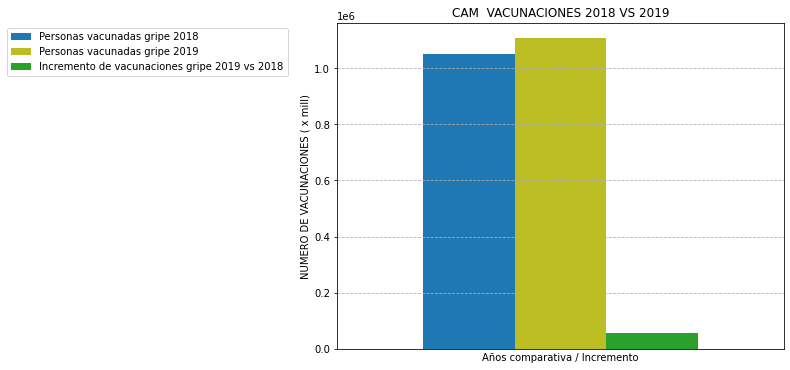

In [59]:

años=["#1f77b4","#bcbd22","#2ca02c"]
vacunaciones_2019.plot(figsize=(8,6),kind='bar',width=0.8, color=años)
plt.legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=10)
plt.xlabel("Años comparativa / Incremento")
plt.grid(linestyle ='dashed')
plt.ylabel("NUMERO DE VACUNACIONES ( x mill)")
plt.title("CAM  VACUNACIONES 2018 VS 2019")
plt.xticks([])

In [60]:
title_2=["Total sanitarios vacunación","Total ptos vacunación"]

In [61]:
vacunacion=[profesionales1,ptos_vac1]
vacunacion

['3535', '700']

In [62]:
data2={"Total sanitarios vacunación":[3535],"Total ptos vacunación":[700]}

In [63]:
operativa=pd.DataFrame(data2)

In [64]:
operativa.rename(index={0:'CAM'})

,Total sanitarios vacunación,Total ptos vacunación
CAM,3535,700


In [65]:
url_2="https://www.europapress.es/madrid/noticia-comunidad-logra-mejor-campana-vacunacion-frente-gripe-mas-11-millones-madrilenos-mas-20200210135909.html"

In [66]:
mi_url_2=urllib.request.urlopen(url_2)

In [67]:
soup_6=BeautifulSoup(mi_url_2,"html.parser")

In [68]:
print(soup_6.prettify())

   <span>
               3
              </span>
              <a href="https://www.infosalus.com/salud-investigacion/noticia-oms-avisa-transmision-actual-covid-19-europa-muy-grave-20200917142525.html" onclick="trackEventGAFull('MasLeidas_3_infosalus.com', 'click', '', 0);">
               <p class="masleidastexto extrawidth">
                La OMS avisa de que la transmisión del Covid-19 en Europa es "muy grave"
               </p>
              </a>
             </li>
             <li class="masleidas">
              <span>
               4
              </span>
              <a href="https://www.europapress.es/internacional/noticia-investigadores-onu-acusan-maduro-crimenes-lesa-humanidad-plantean-intervencion-tpi-20200916142911.html" onclick="trackEventGAFull('MasLeidas_4_Internacional', 'click', '', 0);">
               <p class="masleidastexto extrawidth">
                Investigadores de la ONU acusan a Maduro de crímenes de lesa humanidad y plantean la intervención del TPI
   

In [69]:
dir_1=soup_6.find_all("p")
dir_1

[<p id="ctl00_NavegacionFixed_MenuHome">Menú</p>,
 <p id="AbonadosEP">Abonados</p>,
 <p>MADRID, 10 Feb. (EUROPA PRESS) - </p>,
 <p itemprop="description">   La Comunidad de Madrid ha conseguido su mejor cifra histórica en la campaña frente a la gripe con 1.107.000 personas vacunadas en la región, lo que supone un 6 por ciento más respecto a la campaña anterior, según ha indicado este lunes el consejero de Sanidad, Enrique Ruiz Escudero.</p>,
 <p>   Durante una visita al centro de salud de Almendrales, Escudero ha señalado que de esta cifra el 60 por ciento corresponde a mayores de 65 años, un 9,5 por ciento entre la franja de 60 a 64 años y el restante 30,5 por ciento se reparte en el segmento de población entre seis meses y 59 años.</p>,
 <p>   El titular de la Consejería de Sanidad ha agradecido "su esfuerzo e implicación" en la campaña de vacunación antigripal, mediante un mensaje que ha aparecido hoy en formato pop-up en todos los ordenadores de la red madrileña de salud.</p>,
 <p>

In [70]:
datos_1=dir_1[4]
datos1

<strong>1.107.000 personas vacunadas </strong>

In [71]:
soup7=datos_1

In [72]:
print(type(soup7))

<class 'bs4.element.Tag'>


In [73]:
from bs4 import BeautifulSoup, NavigableString, Tag
for p in soup7:
    if isinstance(p, NavigableString):
        continue
    if isinstance(p, Tag):
        print(p)
    # recursividad para poder quitar los tag del texto scracheado,navigableString me da el texto dentro de una etiqueta como una cadena.

In [74]:
soup7=p
soup7

'   Durante una visita al centro de salud de Almendrales, Escudero ha señalado que de esta cifra el 60 por ciento corresponde a mayores de 65 años, un 9,5 por ciento entre la franja de 60 a 64 años y el restante 30,5 por ciento se reparte en el segmento de población entre seis meses y 59 años.'

In [75]:
mayor_65=str(soup7)

In [76]:
mayor_65=mayor_65[99:101]
mayor_65

'60'

In [77]:
valor_mayor_65=int(mayor_65)
valor_mayor_65

60

In [78]:
de_60_64=str(soup7)

In [79]:
de_60_64=de_60_64[150:154]
de_60_64

'9,5 '

In [80]:
de_60_64= re.sub('[,]', '', de_60_64) 

In [81]:
de_60_64=int(float(de_60_64))/10
de_60_64

9.5

In [82]:
de_6m_59=str(soup7)

In [83]:
de_6m_59=de_6m_59[211:215]
de_6m_59

'30,5'

In [84]:
de_6m_59=re.sub('[,]','',de_6m_59) 

In [85]:
de_6m_59=int(float(de_6m_59))/10
de_6m_59

30.5

In [86]:
porcentajes=[de_6m_59,de_60_64,valor_mayor_65,]
porcentajes

[30.5, 9.5, 60]

In [87]:
porcentaje_edades=["De 0 a 59 años","De 60 a 64 años","Mayores de 65"]

In [88]:
data3={porcentaje_edades[0]:[de_6m_59],porcentaje_edades[1]:[de_60_64],porcentaje_edades[2]:[valor_mayor_65]}
data3

{'De 0 a 59 años': [30.5], 'De 60 a 64 años': [9.5], 'Mayores de 65': [60]}

In [89]:
vacunacion_edades=pd.DataFrame(data3)

In [90]:
vacunacion_edades=vacunacion_edades.rename(index={0:'CAM % vacunaciones'})
vacunacion_edades
# % por target edad de vacunados CAM 

,De 0 a 59 años,De 60 a 64 años,Mayores de 65
CAM % vacunaciones,30.5,9.5,60


In [91]:
#$$$$$ EL TOTAL DE VACUNACIONES REALIZADAS EN LA CAM EN EL AÑO 2019 SE REPARTIERON DE LA SIGUIENTE MANERA SEGÚN LOS TARGET DE EDADES QUE LA COMUNIDAD TIENE EN EL SEGUIMIENTO DE SUS CAMPAÑAS DE VACUNACION

<function matplotlib.pyplot.show(*args, **kw)>

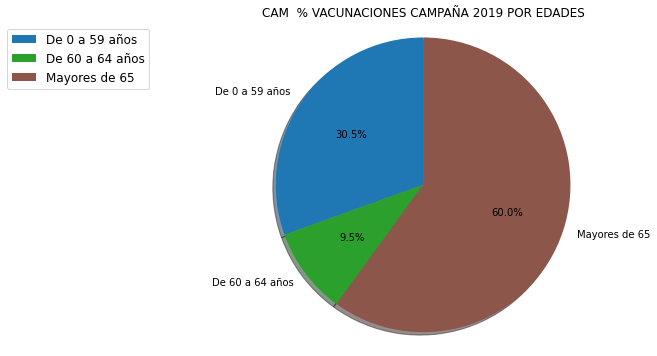

In [92]:

plt.figure(figsize=(8,6))
edades=("De 0 a 59 años","De 60 a 64 años","Mayores de 65")
porcentaje=vacunacion_edades
colores_edad = ["#1f77b4","#2ca02c","#8c564b"]
desfase=(0.0,0.0,0.0)
plt.pie(porcentaje,labels=edades,colors=colores_edad,autopct="%1.1f%%",shadow=True,startangle=90,explode=desfase)
plt.legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.axis("equal")
plt.title("CAM  % VACUNACIONES CAMPAÑA 2019 POR EDADES")
plt.show

In [93]:
name="residentes_edad.csv"

In [94]:
resident_age=pd.read_csv(name,sep=";")


In [95]:
resident_age1=resident_age.loc[:,["rango_edad","municipio_nombre","poblacion_empadronada"]]

In [96]:
resident_age1['rango_edad']=resident_age1['rango_edad'].replace(["De 5 a 9 años"],"De 05 a 09 años")
resident_age1
#Hago un cambio de nombre en el valor de 5 a 9 años porque salía desordenado al tener un nombre con otro formato al resto.

,rango_edad,municipio_nombre,poblacion_empadronada
0,De 0 a 4 años,Acebeda (La),0
1,De 05 a 09 años,Acebeda (La),1
2,De 10 a 14 años,Acebeda (La),0
3,De 15 a 19 años,Acebeda (La),1
4,De 20 a 24 años,Acebeda (La),0
...,...,...,...
7513,De 80 a 84 años,Zarzalejo,24
7514,De 85 a 89 años,Zarzalejo,24
7515,De 90 a 94 años,Zarzalejo,15
7516,De 95 a 99 años,Zarzalejo,0


In [97]:
resident_age1

,rango_edad,municipio_nombre,poblacion_empadronada
0,De 0 a 4 años,Acebeda (La),0
1,De 05 a 09 años,Acebeda (La),1
2,De 10 a 14 años,Acebeda (La),0
3,De 15 a 19 años,Acebeda (La),1
4,De 20 a 24 años,Acebeda (La),0
...,...,...,...
7513,De 80 a 84 años,Zarzalejo,24
7514,De 85 a 89 años,Zarzalejo,24
7515,De 90 a 94 años,Zarzalejo,15
7516,De 95 a 99 años,Zarzalejo,0


In [98]:
resident_age1=resident_age.loc[:,["rango_edad","poblacion_empadronada"]]
resident_age1

,rango_edad,poblacion_empadronada
0,De 0 a 4 años,0
1,De 5 a 9 años,1
2,De 10 a 14 años,0
3,De 15 a 19 años,1
4,De 20 a 24 años,0
...,...,...
7513,De 80 a 84 años,24
7514,De 85 a 89 años,24
7515,De 90 a 94 años,15
7516,De 95 a 99 años,0


In [99]:
resident_age1['rango_edad']=resident_age1['rango_edad'].replace(["De 100 y más años"],"Mas de 100 años")
resident_age1

,rango_edad,poblacion_empadronada
0,De 0 a 4 años,0
1,De 5 a 9 años,1
2,De 10 a 14 años,0
3,De 15 a 19 años,1
4,De 20 a 24 años,0
...,...,...
7513,De 80 a 84 años,24
7514,De 85 a 89 años,24
7515,De 90 a 94 años,15
7516,De 95 a 99 años,0


In [100]:
resident_age1=resident_age1.pivot_table("poblacion_empadronada",index="rango_edad",aggfunc=np.sum)
resident_age1

,poblacion_empadronada
rango_edad,
De 0 a 4 años,325451
De 10 a 14 años,336154
De 15 a 19 años,304387
De 20 a 24 años,316900
De 25 a 29 años,370969
De 30 a 34 años,450790
De 35 a 39 años,551876
De 40 a 44 años,588300
De 45 a 49 años,533317


In [101]:
resident_0_59=resident_age1.iloc[0:12]
resident_0_59

,poblacion_empadronada
rango_edad,
De 0 a 4 años,325451
De 10 a 14 años,336154
De 15 a 19 años,304387
De 20 a 24 años,316900
De 25 a 29 años,370969
De 30 a 34 años,450790
De 35 a 39 años,551876
De 40 a 44 años,588300
De 45 a 49 años,533317


In [102]:
# Sobre el padrón con rango 0-59 aplico el porcentaje de vacunaciones de la campaña gripe 2019 ###

In [103]:
vacunaciones_rango1=resident_0_59*30.5//100
vacunaciones_rango1

,poblacion_empadronada
rango_edad,
De 0 a 4 años,99262.0
De 10 a 14 años,102526.0
De 15 a 19 años,92838.0
De 20 a 24 años,96654.0
De 25 a 29 años,113145.0
De 30 a 34 años,137490.0
De 35 a 39 años,168322.0
De 40 a 44 años,179431.0
De 45 a 49 años,162661.0


In [104]:
vacunaciones_rango1.sum()


poblacion_empadronada    1535617.0
dtype: float64

In [105]:
vacunacion_edades
# PORCENTAJES VACUNACION SEGUN EDADES CAM

,De 0 a 59 años,De 60 a 64 años,Mayores de 65
CAM % vacunaciones,30.5,9.5,60


In [106]:
resident_60_64=resident_age1.iloc[12,:]
resident_60_64


poblacion_empadronada    345868
Name: De 60 a 64 años, dtype: int64

In [107]:
porct=resident_60_64*9.5//100
# Sobre el padrón con rango 60 a 64 años aplico el porcentaje de vacunaciones de la campaña gripe 2019 ###

In [108]:
de0_59=vacunaciones_rango1
de0_59.reindex(["De 0 a 4 años","De 5 a 9 años","De 10 a 14 años","De 15 a 19 años","De 20 a 24 años","De 25 a 29 años","De 30 a 34 años","De 35 a 39 años","De 40 a 44 años","De 45 a 49 años","De 50 a 54 años","De 55 a 59 años"])
# reindexo porque la fila segunda salía en otra posición.

,poblacion_empadronada
rango_edad,
De 0 a 4 años,99262.0
De 5 a 9 años,108696.0
De 10 a 14 años,102526.0
De 15 a 19 años,92838.0
De 20 a 24 años,96654.0
De 25 a 29 años,113145.0
De 30 a 34 años,137490.0
De 35 a 39 años,168322.0
De 40 a 44 años,179431.0


In [109]:
#Muestra las personas que se podrían vacunar con la vacuna covid si aplicamos al padrón de este rango de edad el porcentaje de personas que se vacunaron contra la gripe en la última campaña. Refleja las posibles dosis a comprar para este rango de edad.De a a 59 años

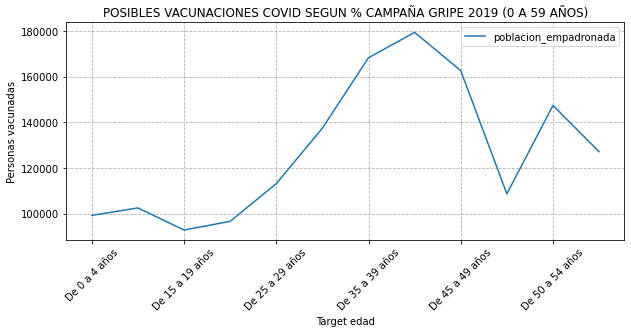

In [110]:

vacunaciones_rango1.plot(figsize=(10,4),label="vacunados de 0 a 59años")
plt.xticks(rotation=45)
plt.legend()
plt.xlabel("Target edad")
plt.ylabel("Personas vacunadas")
plt.title("POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (0 A 59 AÑOS)")
plt.grid(linestyle ='dashed')

In [111]:
#$$$$$ DATOS ESTADISTICOS DE POSIBLES VACUNACIONES APLICANDO %  CAMPAÑA  TARGET EDAD DE 0 A 59 $$$$$$$$

In [112]:
estadistica=de0_59.describe()
estadistica=estadistica.round(2)
estadistica

,poblacion_empadronada
count,12.00
mean,127968.08
std,30491.18
min,92838.00
25%,101710.00
50%,120164.50
75%,151221.25
max,179431.00


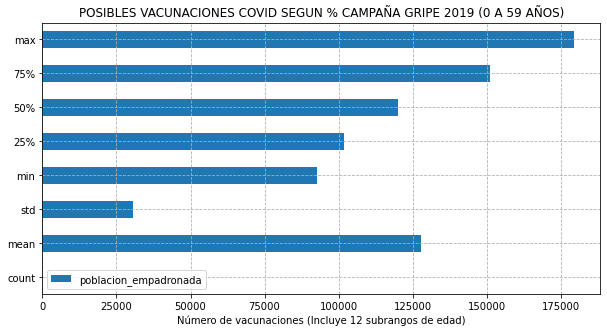

In [113]:

fig=plt.figure
estadistica.plot(figsize=(10,5),kind='barh')
plt.title("POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (0 A 59 AÑOS)")
plt.grid(linestyle ='dashed')
plt.xlabel("Número de vacunaciones (Incluye 12 subrangos de edad)")
plt.show()

In [114]:
resident_60_64=resident_age1.iloc[12]
resident_60_64

poblacion_empadronada    345868
Name: De 60 a 64 años, dtype: int64

In [115]:
porct=resident_60_64*9.5//100
porct
# Sobre el padrón con rango de 60 a 64 años aplico el porcentaje de vacunaciones de la campaña gripe 2019 ###

poblacion_empadronada    32857.0
Name: De 60 a 64 años, dtype: float64

In [116]:
vacunaciones_rango2=pd.DataFrame(porct)
vacunaciones_rango2=vacunaciones_rango2.rename_axis("rango_edad")
vacunaciones_rango2.columns=["vacunaciones 2019"]
vacunaciones_rango2
#Lo pongo en formato Dataframe para luego poder hacer un merge

,vacunaciones 2019
rango_edad,
poblacion_empadronada,32857.0


In [117]:
de60_64=vacunaciones_rango2
de60_64.reindex(["De 60 a 64 años"])
de60_64

,vacunaciones 2019
rango_edad,
poblacion_empadronada,32857.0


In [118]:
# $$$$$$$$ #Muestra las personas que se podrían vacunar con la vacuna covid si aplicamos al padrón de este rango de edad el porcentaje de personas que se vacunaron contra la gripe en la última campaña. Refleja las posibles dosis a comprar para este rango de edad. De 60 a 64 años $$$$$$$$$$$$$$$$$$$$$$$

Text(0.5, 1.0, 'POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (60 A 64 AÑOS)')

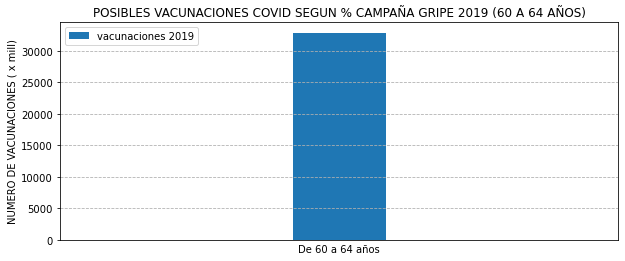

In [119]:
col = ["#1f77b4"]
de60_64.plot(figsize=(10,4),kind='bar',width=0.1, color=col)
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=10)
plt.legend(loc='upper left')
plt.xlabel("De 60 a 64 años")
plt.grid(linestyle ='dashed')
plt.ylabel("NUMERO DE VACUNACIONES ( x mill)")
plt.xticks([])
plt.title(("POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (60 A 64 AÑOS)"))

In [120]:
resident_mayor_65=resident_age1.iloc[13::]
resident_mayor_65

,poblacion_empadronada
rango_edad,
De 65 a 69 años,313424
De 70 a 74 años,266412
De 75 a 79 años,193793
De 80 a 84 años,175087
De 85 a 89 años,113456
De 90 a 94 años,49880
De 95 a 99 años,12352
Mas de 100 años,2083


In [121]:
resident_mayor_65.sum()

poblacion_empadronada    1126487
dtype: int64

In [122]:
vacunaciones_rango3=resident_mayor_65*60//100
vacunaciones_rango3.columns=["Vacunaciones 2019"]
vacunaciones_rango3
# Sobre el padrón con rango edad mayores de 65 años aplico el porcentaje de vacunaciones de la campaña gripe 2019 ###

,Vacunaciones 2019
rango_edad,
De 65 a 69 años,188054
De 70 a 74 años,159847
De 75 a 79 años,116275
De 80 a 84 años,105052
De 85 a 89 años,68073
De 90 a 94 años,29928
De 95 a 99 años,7411
Mas de 100 años,1249


In [123]:
de65mas=vacunaciones_rango3

In [124]:
#Muestra las personas que se podrían vacunar con la vacuna covid si aplicamos al padrón de este rango de edad el porcentaje de personas que se vacunaron contra la gripe en la última campaña. Refleja las posibles dosis a comprar para este rango de edad.De mayores de 65 años

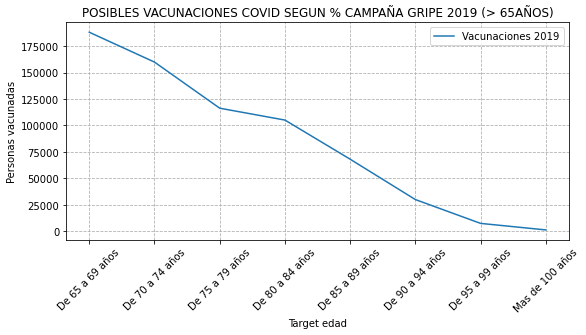

In [125]:
de65mas.plot(figsize=(9,4),label="mayores de 65 años")
plt.xticks(rotation=45)
plt.legend()
plt.xlabel("Target edad")
plt.ylabel("Personas vacunadas")
plt.title("POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (> 65AÑOS)")
plt.grid(linestyle ='dashed')

In [126]:
estadistica2=de65mas.describe()
estadistica2=estadistica2.round(2)
estadistica2

,Vacunaciones 2019
count,8.00
mean,84486.12
std,69646.07
min,1249.00
25%,24298.75
50%,86562.50
75%,127168.00
max,188054.00


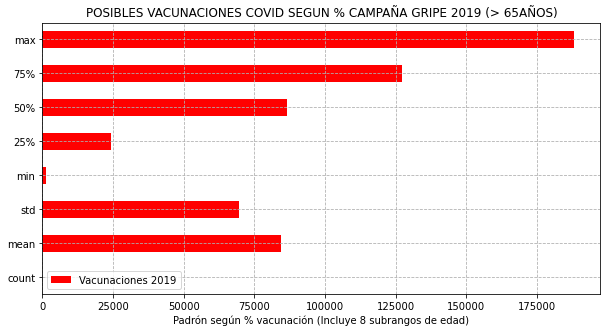

In [127]:
fig=plt.figure
estadistica2.plot(figsize=(10,5),kind='barh',color="r")
plt.title("POSIBLES VACUNACIONES COVID SEGUN % CAMPAÑA GRIPE 2019 (> 65AÑOS)")
plt.grid(linestyle ='dashed')
plt.xlabel("Padrón según % vacunación (Incluye 8 subrangos de edad)")
plt.show()

In [128]:
porcentaje_vac=pd.merge(vacunaciones_rango1,vacunaciones_rango3,on='rango_edad',how='outer')
porcentaje_vac.fillna(0,inplace=True)
porcentaje_vac=porcentaje_vac.astype(int)

#uno dos tablas con vacunados de dos rangos de edad de 0 a 59 años y mayores de 65 años

In [129]:
porcentaje_vac=pd.merge(porcentaje_vac,vacunaciones_rango2,on='rango_edad',how='outer')
porcentaje_vac.fillna(0,inplace=True)
porcentaje_vac=porcentaje_vac.astype(int)

#uno la otra tabla con vacunados de 60 a 64 años. 

In [130]:
porcentaje_vac.reset_index(level=0, inplace=True)

#reindexo para tener rango de edad en columna y poder hacer cambios en el nombre de la fila 20

In [131]:
porcentaje_vac['rango_edad']=porcentaje_vac['rango_edad'].replace(["poblacion_empadronada"],"De 60 a 64 años")

#Cambio nombre fila 20

In [132]:
porcentaje_vac.rename(columns={'Vacunaciones 2019_x':'Vacunados 0-59 años','Vacunaciones 2019_y':'Vacunados > 65 años','vacunaciones 2019':'Vacunados 60_64 años' },inplace=True)

#cambio nombres de columnas para mejor visualización

In [133]:
resident_age1=pd.merge(resident_age1,porcentaje_vac,on='rango_edad',how='outer')
#hago un un merge e incorporo la tabla de empadronados totales

In [134]:
resident_age1=resident_age1.reindex([0,9,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20])
#reindexo porque quiero que la fila 9 sea la 2


In [135]:
resident_age1.reset_index(drop=True,inplace=True)
#reindexo y quito el indice para poner indice por defecto.


In [136]:
resident_age1.columns=["rango_edad","poblacion total","0 a 59",">65","60 a 64"]

In [137]:
resident_age1

,rango_edad,poblacion total,0 a 59,>65,60 a 64
0,De 0 a 4 años,325451,99262,0,0
1,De 5 a 9 años,356381,108696,0,0
2,De 10 a 14 años,336154,102526,0,0
3,De 15 a 19 años,304387,92838,0,0
4,De 20 a 24 años,316900,96654,0,0
5,De 25 a 29 años,370969,113145,0,0
6,De 30 a 34 años,450790,137490,0,0
7,De 35 a 39 años,551876,168322,0,0
8,De 40 a 44 años,588300,179431,0,0
9,De 45 a 49 años,533317,162661,0,0


In [138]:
resident_vac_edad=resident_age1
resident_vac_edad

,rango_edad,poblacion total,0 a 59,>65,60 a 64
0,De 0 a 4 años,325451,99262,0,0
1,De 5 a 9 años,356381,108696,0,0
2,De 10 a 14 años,336154,102526,0,0
3,De 15 a 19 años,304387,92838,0,0
4,De 20 a 24 años,316900,96654,0,0
5,De 25 a 29 años,370969,113145,0,0
6,De 30 a 34 años,450790,137490,0,0
7,De 35 a 39 años,551876,168322,0,0
8,De 40 a 44 años,588300,179431,0,0
9,De 45 a 49 años,533317,162661,0,0


In [139]:
#$$$$$COMPARAMOS TOTAL ENPADRONADOS CON VACUNACIONES POSIBLES APLICANDO EL % DE VACUNACIONES CAMPAÑA 2019 POR RANGOS DE EDAD DE CAM  $$$$$$$

Text(0.5, 1.0, 'PADRON vs POSIBLES VACUNACIONES COVID (APLICANDO % CAMPAÑA GRIPE 2019 CAM)')

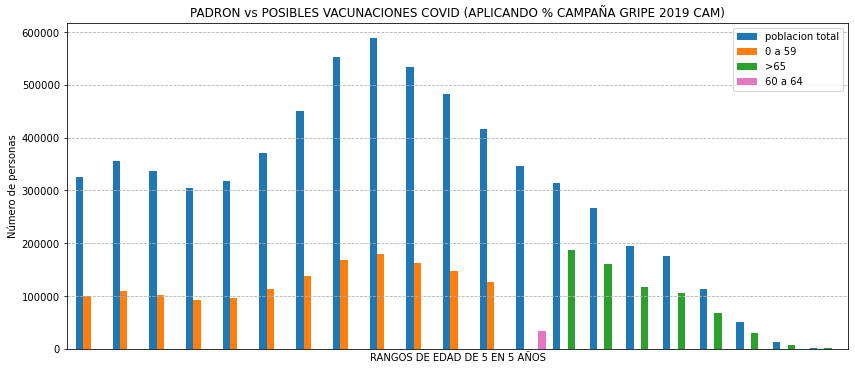

In [140]:
edad=["#1f77b4","#ff7f0e","#2ca02c","#e377c2"]
resident_vac_edad.plot(figsize=(14,6),kind='bar',width=0.8, color=edad)
plt.xlabel("RANGOS DE EDAD DE 5 EN 5 AÑOS")
plt.grid(linestyle ='dashed')
plt.ylabel("Número de personas")
plt.xticks([])
plt.title("PADRON vs POSIBLES VACUNACIONES COVID (APLICANDO % CAMPAÑA GRIPE 2019 CAM)")

In [141]:
de0_59.sum()

poblacion_empadronada    1535617.0
dtype: float64

In [142]:
max1=de0_59.sum()
max1=int(max1)
max1

1535617

In [143]:
resident_60_64

poblacion_empadronada    345868
Name: De 60 a 64 años, dtype: int64

In [144]:
max2=resident_60_64
max2=int(max2)
max2

345868

In [145]:
de65mas.sum()

Vacunaciones 2019    675889
dtype: int64

In [146]:
max3=de65mas.sum()
max3=int(max3)
max3

675889

In [147]:
#$$$$$$ TOTAL VACUNACIONES POSIBLES APLICANDO LOS PORCENTAJES DE VACUNACION A TODOS EL PADRON

In [148]:
Max_vac_rangos_padron=max1+max2+max3
Max_vac_rangos_padron=float(Max_vac_rangos_padron)
Max_vac_rangos_padron

2557374.0

In [149]:
#$$$$$$$$$$$$$ PODEMOS OBSERVAR LA CORRELACION ENTRE PADRON TOTAL Y POSIBLES VACUNADOS POR RANGOS
#Sobre padron total el rango de edad de mas vacunaciones posible según % campaña anteriores, tiene una correlación mayor que los rangos con menor porcentaje de vacunación#

,poblacion total,0 a 59,>65,60 a 64
poblacion total,1.000000,0.864081,-0.288005,0.048499
0 a 59,0.864081,1.000000,-0.610901,-0.243819
>65,-0.288005,-0.610901,1.000000,-0.125277
60 a 64,0.048499,-0.243819,-0.125277,1.000000


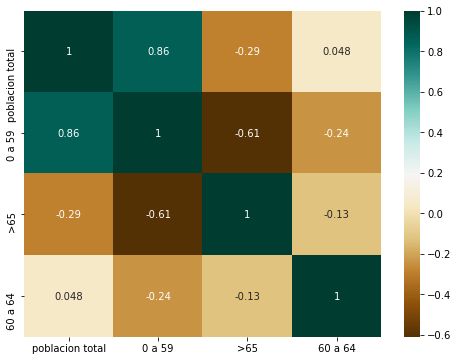

In [150]:
plt.figure(figsize=(8,6))
c=resident_vac_edad.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [151]:
total_empadronados_cam=resident_vac_edad.iloc[:,1].sum()
total_empadronados_cam

6507184

In [152]:
x=[total_empadronados_cam]
rotulo=["Total empadronados CAM"]
resultados={rotulo[0]:x}
resultados
#lo paso a diccionario

{'Total empadronados CAM': [6507184]}

In [153]:
["Gasto CAM vacuna gripe ","Coste dosis vacuna gripe","Dosis adquiridas","Personas vacunadas gripe 2019","Personas vacunadas gripe 2018","Incremento de vacunaciones gripe 2019 vs 2018"]

['Gasto CAM vacuna gripe ',
 'Coste dosis vacuna gripe',
 'Dosis adquiridas',
 'Personas vacunadas gripe 2019',
 'Personas vacunadas gripe 2018',
 'Incremento de vacunaciones gripe 2019 vs 2018']

In [154]:
gasto_vacunas_def=gasto_vacunas.drop(["Dosis adquiridas","Personas vacunadas gripe 2018","Incremento de vacunaciones gripe 2019 vs 2018"],axis=1)
gasto_vacunas_def

,Gasto CAM vacuna gripe 2019,Coste dosis vacuna gripe,Personas vacunadas gripe 2019
0,4716400,3.77,1107000


In [155]:
#$$$$$$$ RECOPILO TABLA CREADA ANTERIOR Y LA COMPLETO CON TABLA POSTERIOR PORQUE SERVIRA PARA LLEGAR A LA CONCLUSION DESEADA DEL ESTUDIO. $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [156]:
gasto_vacunas_def["Total empadronados CAM"]=x
gasto_vacunas_def
#Añado la columna total empadronados

,Gasto CAM vacuna gripe 2019,Coste dosis vacuna gripe,Personas vacunadas gripe 2019,Total empadronados CAM
0,4716400,3.77,1107000,6507184


In [157]:
# $$$$$$$$$$$$$$$$$$$ web scraping de información de un posible coste de vacuna COVID de tres laboratorios de primer orden.$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [158]:
url_3="https://www.goal.com/es/noticias/cuanto-cuesta-vacuna-covid-19/1d0ngem2skf521hey98yr7shru"

In [159]:
mi_url_3=urllib.request.urlopen(url_3)

In [160]:
soup_8=BeautifulSoup(mi_url_3,"html.parser")

In [161]:
print(soup_8.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML Basic 1.1//EN" "http://www.w3.org/TR/xhtml-basic/xhtml-basic11.dtd">
<html data-status-code="200" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Precio de la inyección para el coronavirus y cuándo estaría lista" name="description"/>
  <meta content="Coronavirus,México,Chile,Colombia,España,Argentina" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   ¿Cuánto cuesta la vacuna contra el COVID-19? | Goal.com
  </title>
  <style type="text/css">
   body,html{font-family:Arial,Helvetica,Helvetica Neue,sans-serif;font-size:16px;color:#081f2c;padding:0;margin:0}a{text-decoration:none;color:#00a9ce}h1,h2,h3,h4,h5,h6{font-weight:700;color:#081f2c;margin:10px 0}h1{font-size:18px}h2,h3{font-size:16px}h5,h6{font-size:14px}ul{padding-left:10px;margin-left:0}.page-container{padding:2px}.page-header,.widget-he

In [162]:
direct_1=soup_8.find_all("h2")
direct_1

[<h2 style="text-align: center;">LA DE MODERNA</h2>,
 <h2 style="text-align: center;">LA DE OXFORD Y ASTRAZENECA</h2>,
 <h2 style="text-align: center;">LA DE PFIZER Y BIONTECH</h2>]

In [163]:
direct_2=soup_8.find_all("strong")
direct_2

[<strong> tecnología </strong>,
 <strong>ciencia</strong>,
 <strong>vacuna</strong>,
 <strong>coronavirus</strong>,
 <strong>20 millones de casos totales</strong>,
 <strong>700 mil muertes </strong>,
 <strong>fútbol</strong>,
 <strong>Fase 3</strong>,
 <strong>ensayos clínicos</strong>,
 <strong>seguridad</strong>,
 <strong>eficacia</strong>,
 <strong>precio</strong>,
 <strong>cantidades exactas</strong>,
 <strong>Goal</strong>,
 <strong>dólares y euros</strong>,
 <strong>Stephane Bancel</strong>,
 <strong>32 y 37 doláres</strong>,
 <strong>2.8 dólares</strong>,
 <strong> Pascal Soriot</strong>,
 <strong> 20 dólares por dosis </strong>,
 <strong>17.29 euros </strong>,
 <strong>Sally Beatty</strong>]

In [164]:
moderna=direct_1[0]
moderna

<h2 style="text-align: center;">LA DE MODERNA</h2>

In [165]:
soup_8=moderna

In [166]:
laboratori_1=str((soup_8.get_text()))
laboratori_1=laboratori_1[6:13]
laboratori_1

'MODERNA'

In [167]:
oxford=direct_1[1]
oxford

<h2 style="text-align: center;">LA DE OXFORD Y ASTRAZENECA</h2>

In [168]:
soup_9=oxford

In [169]:
laboratori_2=str((soup_9.get_text()))
laboratori_2=laboratori_2[6:12]
laboratori_2

'OXFORD'

In [170]:
pfizer=direct_1[2]
soup_10=pfizer
laboratori_3=str((soup_10.get_text()))
pfizer

<h2 style="text-align: center;">LA DE PFIZER Y BIONTECH</h2>

In [171]:
laboratori_3=laboratori_3[6:23]
laboratori_3

'PFIZER Y BIONTECH'

In [172]:
precio_moderna=direct_2[16]
precio_moderna

<strong>32 y 37 doláres</strong>

In [173]:
soup_10=precio_moderna

In [174]:
labor_1_precio=str((soup_10.get_text()))
labor_1_precio=labor_1_precio[5:7]
labor_1_precio

'37'

In [175]:
labor_1_precio=int(labor_1_precio)
labor_1_precio=labor_1_precio+13
labor_1_precio

50

In [176]:
precio_oxford=direct_2[17]
precio_oxford

<strong>2.8 dólares</strong>

In [177]:
soup_11=precio_oxford

In [178]:
labor_2_precio=str((soup_11.get_text()))
labor_2_precio=labor_2_precio[0:3]
labor_2_precio

'2.8'

In [179]:
labor_2_precio=float(labor_2_precio)
labor_2_precio=labor_2_precio-0.3
labor_2_precio

2.5

In [180]:
precio_pfizer=direct_2[20]
precio_pfizer

<strong>17.29 euros </strong>

In [181]:
soup_12=precio_pfizer

In [182]:
labor_3_precio=str((soup_12.get_text()))
labor_3_precio=labor_3_precio[0:5]
labor_3_precio

'17.29'

In [183]:
labor_3_precio=float(labor_3_precio)
labor_3_precio

17.29

In [184]:
laboratorios_covid=[laboratori_1,laboratori_2,laboratori_3]
laboratorios_covid

['MODERNA', 'OXFORD', 'PFIZER Y BIONTECH']

In [185]:
precio_covid=[labor_1_precio,labor_2_precio,labor_3_precio]
precio_covid

[50, 2.5, 17.29]

In [186]:
laboratorios_precios={laboratorios_covid[0]:[labor_1_precio],laboratorios_covid[1]:[labor_2_precio],laboratorios_covid[2]:[labor_3_precio]}


In [187]:
laboratorios_precios

{'MODERNA': [50], 'OXFORD': [2.5], 'PFIZER Y BIONTECH': [17.29]}

In [188]:
vacuna_covid_precios=pd.DataFrame(laboratorios_precios)
vacuna_covid_precios

,MODERNA,OXFORD,PFIZER Y BIONTECH
0,50,2.5,17.29


In [189]:
#$$$$$$$ REPRESENTAMOS INFORMACION DE TRES LABORATORIOS CON VACUNA COVID EN FASE 3 Y LOS POSIBLES PRECIOS DE VENTA QUE ESTÁN ESTIMANDO $$$$$$$$$$$$$$$$$$$$$$$$$$

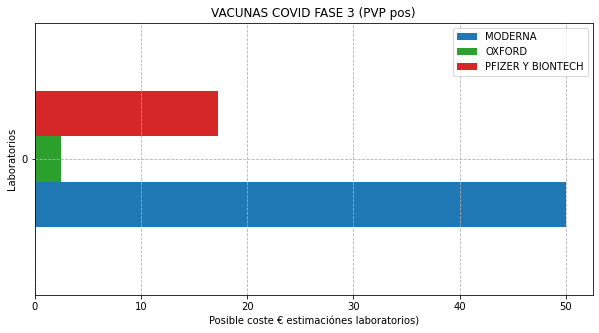

In [190]:

colores=["#1f77b4","#2ca02c","#d62728"]
fig=plt.figure
vacuna_covid_precios.plot(figsize=(10,5),kind='barh',color=colores)
plt.title("VACUNAS COVID FASE 3 (PVP pos)")
plt.grid(linestyle ='dashed')
plt.xlabel("Posible coste € estimaciónes laboratorios)")
plt.ylabel("Laboratorios")
plt.show()

In [191]:
vacuna_covid_precios_m=vacuna_covid_precios.iloc[0,0]
vacuna_covid_precios_m

50

In [192]:
valores=[vacuna_covid_precios_m]
rotulo1=["VAC COVID (LA MODERNA)"]
resultados1={rotulo1[0]:valores}
resultados1

{'VAC COVID (LA MODERNA)': [50]}

In [193]:
covid_coste_cm=gasto_vacunas_def.iloc[:,1:4]
covid_coste_cm

,Coste dosis vacuna gripe,Personas vacunadas gripe 2019,Total empadronados CAM
0,3.77,1107000,6507184


In [194]:
covid_coste_cm=covid_coste_cm.loc[:, ::-1]
covid_coste_cm

,Total empadronados CAM,Personas vacunadas gripe 2019,Coste dosis vacuna gripe
0,6507184,1107000,3.77


In [195]:
covid_coste_cm["VAC COVID (LA MODERNA)"]=valores
covid_coste_cm

,Total empadronados CAM,Personas vacunadas gripe 2019,Coste dosis vacuna gripe,VAC COVID (LA MODERNA)
0,6507184,1107000,3.77,50


In [196]:
vacuna_covid_precios_m2=vacuna_covid_precios.iloc[0,1]
vacuna_covid_precios_m2

2.5

In [197]:
valores1=[vacuna_covid_precios_m2]
rotulo2=["VAC COVID (LA OXFORD)"]
resultados2={rotulo2[0]:valores1}
resultados2

{'VAC COVID (LA OXFORD)': [2.5]}

In [198]:
covid_coste_cm["VAC COVID (LA OXFORD)"]=valores1
covid_coste_cm

,Total empadronados CAM,Personas vacunadas gripe 2019,Coste dosis vacuna gripe,VAC COVID (LA MODERNA),VAC COVID (LA OXFORD)
0,6507184,1107000,3.77,50,2.5


In [199]:
vacuna_covid_precios_m3=vacuna_covid_precios.iloc[0,2]
vacuna_covid_precios_m3

17.29

In [200]:
valores2=[vacuna_covid_precios_m3]
rotulo3=["VAC COVID (PFIZER Y BIONTECH)"]
resultados3={rotulo3[0]:valores2}
resultados3

{'VAC COVID (PFIZER Y BIONTECH)': [17.29]}

In [201]:
covid_coste_cm["VAC COVID (PFIZER Y BIONTECH)"]=valores2
covid_coste_cm

,Total empadronados CAM,Personas vacunadas gripe 2019,Coste dosis vacuna gripe,VAC COVID (LA MODERNA),VAC COVID (LA OXFORD),VAC COVID (PFIZER Y BIONTECH)
0,6507184,1107000,3.77,50,2.5,17.29


In [202]:
covid_coste_cm.iloc[:,0]

0    6507184
Name: Total empadronados CAM, dtype: int64

In [203]:
gripe_gasto_total_empadronados=covid_coste_cm.iloc[:,0]*covid_coste_cm.iloc[:,2]
gripe_gasto_total_empadronados=float(gripe_gasto_total_empadronados)
gripe_gasto_total_empadronados

24532083.68

In [204]:
moderna_gasto_total_empadronados=covid_coste_cm.iloc[:,0]*covid_coste_cm.iloc[:,3]
moderna_gasto_total_empadronados=float(moderna_gasto_total_empadronados)
moderna_gasto_total_empadronados

325359200.0

In [205]:
oxford_gasto_total_empadronados=covid_coste_cm.iloc[:,0]*covid_coste_cm.iloc[:,4]
oxford_gasto_total_empadronados=float(oxford_gasto_total_empadronados)
oxford_gasto_total_empadronados

16267960.0

In [206]:
pfizer_gasto_total_empadronados=covid_coste_cm.iloc[:,0]*covid_coste_cm.iloc[:,5]
pfizer_gasto_total_empadronados=float(int(pfizer_gasto_total_empadronados))
pfizer_gasto_total_empadronados


112509211.0

In [207]:
covid_coste_cm.iloc[:,1]

0    1107000
Name: Personas vacunadas gripe 2019, dtype: int64

In [208]:
gripe_gasto_total_vacunados=covid_coste_cm.iloc[:,1]*covid_coste_cm.iloc[:,2]
gripe_gasto_total_vacunados=float(gripe_gasto_total_vacunados)
gripe_gasto_total_vacunados

4173390.0

In [209]:
moderna_gasto_total_vacunados=covid_coste_cm.iloc[:,1]*covid_coste_cm.iloc[:,3]
moderna_gasto_total_vacunados=float(moderna_gasto_total_vacunados)
moderna_gasto_total_vacunados

55350000.0

In [210]:
oxford_gasto_total_vacunados=covid_coste_cm.iloc[:,1]*covid_coste_cm.iloc[:,4]
oxford_gasto_total_vacunados=float(oxford_gasto_total_vacunados)
oxford_gasto_total_vacunados

2767500.0

In [211]:
pfizer_gasto_total_vacunados=covid_coste_cm.iloc[:,1]*covid_coste_cm.iloc[:,5]
pfizer_gasto_total_vacunados=float(pfizer_gasto_total_vacunados)
pfizer_gasto_total_vacunados

19140030.0

In [212]:
gasto1=["coste vac gripe total poblacion","coste vac COVID-MODERNA total poblacion","coste vac COVID-OXFORD total poblacion","coste vac COVID-PFIZER & BIONTECH total poblacion"]

In [213]:
valor_gasto1=[gripe_gasto_total_empadronados,moderna_gasto_total_empadronados,oxford_gasto_total_empadronados,pfizer_gasto_total_empadronados]

In [214]:
data_gasto_empadronados={gasto1[0]:[gripe_gasto_total_empadronados],gasto1[1]:[moderna_gasto_total_empadronados], gasto1[2]:[oxford_gasto_total_empadronados],gasto1[3]:[pfizer_gasto_total_empadronados]}
data_gasto_empadronados

{'coste vac gripe total poblacion': [24532083.68],
 'coste vac COVID-MODERNA total poblacion': [325359200.0],
 'coste vac COVID-OXFORD total poblacion': [16267960.0],
 'coste vac COVID-PFIZER & BIONTECH total poblacion': [112509211.0]}

In [215]:
posible_coste_covid_cm_oblig=pd.DataFrame(data_gasto_empadronados)


In [216]:
posible_coste_covid_cm_oblig.rename(index={0:'CAM'})

,coste vac gripe total poblacion,coste vac COVID-MODERNA total poblacion,coste vac COVID-OXFORD total poblacion,coste vac COVID-PFIZER & BIONTECH total poblacion
CAM,24532083.68,325359200.0,16267960.0,112509211.0


In [217]:
#$$$$$$$$$$$$$$$$$$$INFORMACION DEL COSTE QUE TENDRIA PARA CAM COMPRAR DOSIS VACUNAS COVID A LOS PRECIOS ESTIMADOS DE LOS LABORATORIOS SI LA VACUNA SE IMPUSIERA COMO OBLIGATORIA EN LA POBLACION $$$$$$$$$$$$$$$$$$

Text(0.5, 1.0, 'CAM : COSTE VACUNAS COVID FASE 3 VS GRIPE  (OBLIGATORIA)')

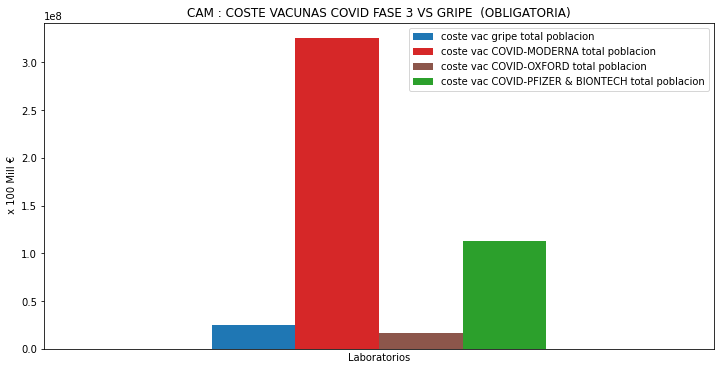

In [218]:

colores= ["#1f77b4","#d62728","#8c564b","#2ca02c"]
posible_coste_covid_cm_oblig.plot(figsize=(12,6),kind='bar',color=colores)
plt.legend(loc=1, fontsize=10)
plt.xlabel("Laboratorios")
plt.ylabel(" x 100 Mill €")
plt.xticks([])
plt.title("CAM : COSTE VACUNAS COVID FASE 3 VS GRIPE  (OBLIGATORIA)")

In [219]:
gasto2=["coste vacuna gripe ","coste vac COVID-MODERNA","coste vac COVID-OXFORD ","coste vac COVID-PFIZER & BIONTECH "]

In [220]:
valor_gasto2=[Max_vac_rangos_padron,moderna_gasto_total_vacunados,oxford_gasto_total_vacunados,pfizer_gasto_total_vacunados]

In [221]:
valor_gasto2

[2557374.0, 55350000.0, 2767500.0, 19140030.0]

In [222]:
data_gastos_vacunados={gasto2[0]:[Max_vac_rangos_padron],gasto2[1]:[moderna_gasto_total_vacunados],gasto2[2]:[oxford_gasto_total_vacunados],gasto2[3]:[pfizer_gasto_total_vacunados]}


In [223]:
data_gastos_vacunados

{'coste vacuna gripe ': [2557374.0],
 'coste vac COVID-MODERNA': [55350000.0],
 'coste vac COVID-OXFORD ': [2767500.0],
 'coste vac COVID-PFIZER & BIONTECH ': [19140030.0]}

In [224]:
posible_coste_covid_cm_vacunados=pd.DataFrame(data_gastos_vacunados)

In [225]:
posible_coste_covid_cm_vacunados.rename(index={0:'CAM'})

,coste vacuna gripe,coste vac COVID-MODERNA,coste vac COVID-OXFORD,coste vac COVID-PFIZER & BIONTECH
CAM,2557374.0,55350000.0,2767500.0,19140030.0


Text(0.5, 1.0, 'CAM:POSIBLE COSTE DE VACUNA COVID FASE 3 (SEGUN % CAMPAÑA VACUNACION 2019)')

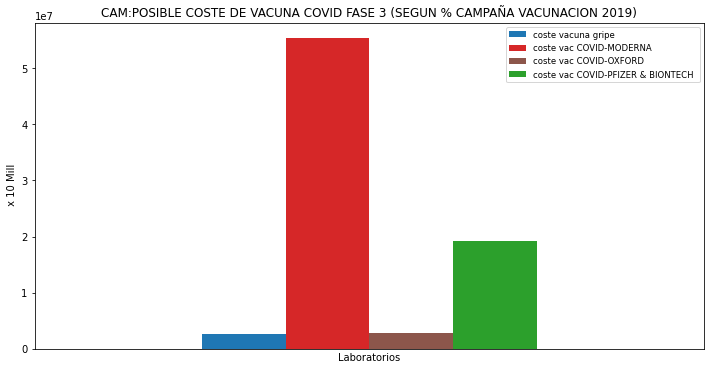

In [226]:
colores= ["#1f77b4","#d62728","#8c564b","#2ca02c"]
posible_coste_covid_cm_vacunados.plot(figsize=(12,6),kind='bar',color=colores)
plt.legend(loc=1, fontsize=8.5)
plt.xlabel("Laboratorios")
plt.ylabel(" x 10 Mill")
plt.xticks([])
plt.title("CAM:POSIBLE COSTE DE VACUNA COVID FASE 3 (SEGUN % CAMPAÑA VACUNACION 2019)")

In [227]:
tiempo=["Negociación de datos","Limpieza de datos","Visualización","Servidor"]

In [228]:
dias1=[6]
dias2=[5]
dias3=[3]
dias4=[4]

In [229]:
tiempo_proyecto={tiempo[0]:dias1,tiempo[1]:dias2,tiempo[2]:dias3,tiempo[3]:dias4}
tiempo_proyecto

{'Negociación de datos': [6],
 'Limpieza de datos': [5],
 'Visualización': [3],
 'Servidor': [4]}

In [230]:
tiempo_total=pd.DataFrame(tiempo_proyecto)
tiempo_total

,Negociación de datos,Limpieza de datos,Visualización,Servidor
0,6,5,3,4


<function matplotlib.pyplot.show(*args, **kw)>

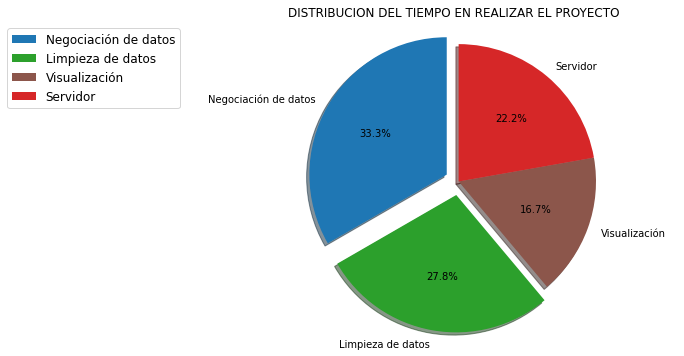

In [231]:
plt.figure(figsize=(8,6))

dias=tiempo_total
colores_edad = ["#1f77b4","#2ca02c","#8c564b","#d62728"]
desfase=(0.1,0.1,0.0,0.0)
plt.pie(dias,labels=tiempo,colors=colores_edad,autopct="%1.1f%%",shadow=True,startangle=90,explode=desfase)
plt.legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.axis("equal")
plt.title("DISTRIBUCION DEL TIEMPO EN REALIZAR EL PROYECTO")
plt.show